In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing()

In [3]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
from os import X_OK
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
X_train.shape

(11610, 8)

In [8]:
X_test.shape

(5160, 8)

In [9]:
X_valid.shape

(3870, 8)

In [16]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss="mean_squared_error",optimizer="sgd", metrics=["mae"])

In [22]:
model_history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3835 - mae: 0.4419 - val_loss: 0.3446 - val_mae: 0.4144
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3756 - mae: 0.4359 - val_loss: 0.3377 - val_mae: 0.4100
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3703 - mae: 0.4320 - val_loss: 0.3338 - val_mae: 0.4074
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3659 - mae: 0.4287 - val_loss: 0.3315 - val_mae: 0.4054
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3614 - mae: 0.4258 - val_loss: 0.3298 - val_mae: 0.4035
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3583 - mae: 0.4233 - val_loss: 0.3283 - val_mae: 0.4020
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3553 - mae: 0.4213 - val_loss: 0.3271 - val_mae: 0.4007
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3515 - mae: 0.4191 - val_loss: 0.3318 - val_mae: 0.3999
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [23]:
mae_test=model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3306 - mae: 0.4028  


In [24]:
model_history.history

{'loss': [0.370633989572525,
  0.36341622471809387,
  0.3582857549190521,
  0.35388273000717163,
  0.3496803343296051,
  0.3467734456062317,
  0.3438849151134491,
  0.34041303396224976,
  0.3383302390575409,
  0.33659255504608154],
 'mae': [0.4329279363155365,
  0.4276823401451111,
  0.42396098375320435,
  0.42090722918510437,
  0.4181149899959564,
  0.4157503843307495,
  0.4138101041316986,
  0.411668062210083,
  0.4101308584213257,
  0.40873607993125916],
 'val_loss': [0.3445640802383423,
  0.33773073554039,
  0.33375558257102966,
  0.331478089094162,
  0.3298230767250061,
  0.3283383250236511,
  0.3271080553531647,
  0.3318326473236084,
  0.32658910751342773,
  0.32570919394493103],
 'val_mae': [0.41444894671440125,
  0.4100281894207001,
  0.4073523283004761,
  0.40535280108451843,
  0.40345829725265503,
  0.40198269486427307,
  0.40071824193000793,
  0.39987045526504517,
  0.3986455798149109,
  0.3978615403175354]}

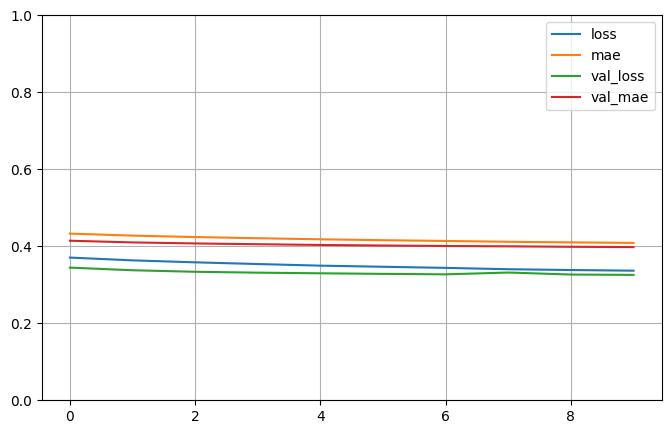

In [25]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
X_new=X_test[:3]
y_pred=model.predict(X_new)
print(y_pred)
print(y_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.67668545]
 [1.6268349 ]
 [4.2994814 ]]
[0.477   0.458   5.00001]
